# Aryan Thakur
## 23AI101
### Assignment 3

<B>Part 1- Simple Linear Regression</b>

• Read the data from above mentioned dataset and define X and y as numpy array

In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv("/home/escanor/Desktop/Dataset/StudentPerformance.csv")
x = data[['G2']].values #G2 stands for grade of students in standard 2 in maths
y = data['G3'].values #G2 stands for grade of students in standard 3 in maths



• Add column at position 0 with all values=1 (pandas.DataFrame.insert function)

In [28]:
data.insert(0 , 'New Col', 1)

• Print rows from 40 to 55.

In [29]:
print(data.iloc[40:56])

    New Col  G2   G3
40        1  50   55
41        1  60   60
42        1  90   90
43        1  40   55
44        1  50   45
45        1  40   30
46        1  60   55
47        1  95  100
48        1  75   70
49        1  35   35
50        1  65   65
51        1  65   65
52        1  55   50
53        1  50   55
54        1  65   65
55        1  45   50


• Print the shape and datatype of both X and y

In [30]:
print("Shape of x : ", x.shape)
print("DataType of x :" , type(x))
print("Shape of y : ", y.shape)
print("DataType of y :" , type(y))

Shape of x :  (395, 1)
DataType of x : <class 'numpy.ndarray'>
Shape of y :  (395,)
DataType of y : <class 'numpy.ndarray'>


<b>Implement simple linear regression from scratch<b>

1. Write hypothesis function to predict values

In [31]:
def hypothesis(x, w):
    return np.dot(x,w)


o Write function for calculating mean_squared_error

In [32]:
def mean_squared_error(actual_value, predicted_value):
    return np.mean((actual_value-predicted_value)**2)

o Write function to return gradients for given weights

In [33]:
def compute_gradients(X, y , weights):
    n = len(y)
    y_pred = hypothesis ( X , weights)
    errors = y_pred - y
    gradients = (2/n ) * np.dot( X.T , errors)
    return gradients

In [34]:
def gradient_descent(x, y, w, learning_rate, iterations):
    m = len(y) 
    for _ in range(iterations):
        gradients = compute_gradients(x, y, w)  # ✅ Use 'x' instead of 'X'
        w -= learning_rate * gradients  # ✅ Update 'w' instead of an unused variable
    return w


In [35]:
X = data['G2']
Y = data['G3']
print(X)
X = X.values.reshape(395,1)
X = np.c_[np.ones(X.shape[0]), X] #intercept term
Y = Y.values

w = np.zeros(X.shape[1])  # Initial weight values
learning_rate = 0.001
iterations = 1000

0      30
1      25
2      40
3      70
4      50
       ..
390    45
391    80
392    40
393    60
394    45
Name: G2, Length: 395, dtype: int64


Perform gradient descent taking help of above functions

In [41]:
w = gradient_descent(X, y, w, learning_rate = 0.0001, iterations = 1000)


In [37]:
predictions = hypothesis(X, w)


In [46]:
print("\nTrained parameters (weight):", w)
print("Mean Squared Error:", mean_squared_error(y, predictions))


Trained parameters (weight): [-0.28263006  0.99104458]
Mean Squared Error: 99.95556958823806


• Remove outliers, train again and see the difference in error.

In [40]:

# Outlier Removal Using IQR
Q1 = np.percentile(y, 25)
Q3 = np.percentile(y, 75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = data[(y >= lower_bound) & (y <= upper_bound)]

# Define new X and y
X = filtered_data["G2"].values.reshape(-1, 1)  # Convert to NumPy array and reshape
y = filtered_data["G3"].values

# Add intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
w = np.zeros(X.shape[1])  # Initial theta
learning_rate = 0.0001
iterations = 1000

# Train the model
w = gradient_descent(X, y, w, learning_rate, iterations)

# Make predictions
predictions = hypothesis(X, w)

# Calculate and display error
mse = mean_squared_error(y, predictions)
print("Trained parameters (theta):", w)
print("Mean Squared Error after outlier removal:", mse)

Trained parameters (theta): [-0.13475524  0.98858631]
Mean Squared Error after outlier removal: 99.95556958823806


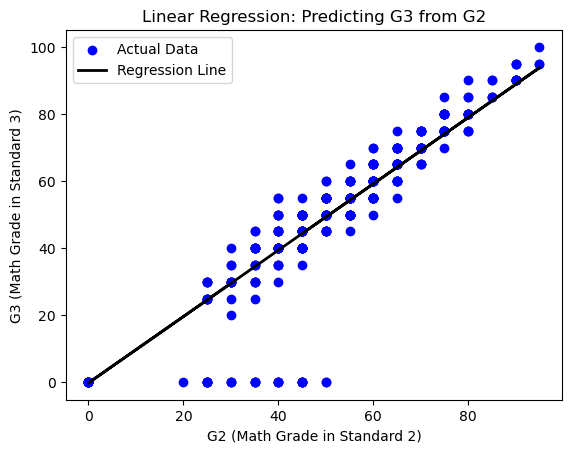

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the actual data points
plt.scatter(X[:, 1], Y, color='blue', label='Actual Data', )

# Line plot for the regression line
plt.plot(X[:, 1], predictions, color='black', linewidth=2, label='Regression Line')

plt.xlabel("G2 (Math Grade in Standard 2)")
plt.ylabel("G3 (Math Grade in Standard 3)")
plt.title("Linear Regression: Predicting G3 from G2")
plt.legend()
plt.show()